# AUPRC plots of ML models when predicting cancer using transcriptomic data.

In this notebook, we evaluate deep learning models trained on transcriptomic data (Tissue-specific expression of protein coding genes, lncRNAs and inclusion of splice sites) on the task of predicting normal versus tumor tissues. This notebook reproduces supplementary Figures S3-S5 of our pan-cancer manuscript.  

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
import matplotlib

cmd_dir = "../results/paper_results/"
fig_dir = "../figures/"

binary_protein_coding = ["Iter0_pc_normal_vs_cancer.npz", 
                   "Iter1_pc_normal_vs_cancer.npz", 
                   "Iter2_pc_normal_vs_cancer.npz"]

binary_lncRNA = ["Iter0_lncrna_normal_vs_cancer.npz", 
                   "Iter1_lncrna_normal_vs_cancer.npz", 
                   "Iter2_lncrna_normal_vs_cancer.npz"]

binary_splicing = ["Iter0_splicing_normal_vs_cancer.npz", 
                   "Iter1_splicing_normal_vs_cancer.npz", 
                   "Iter2_splicing_normal_vs_cancer.npz"]

# Precision-Recall curve for the test set (Supplementary Figure S3)

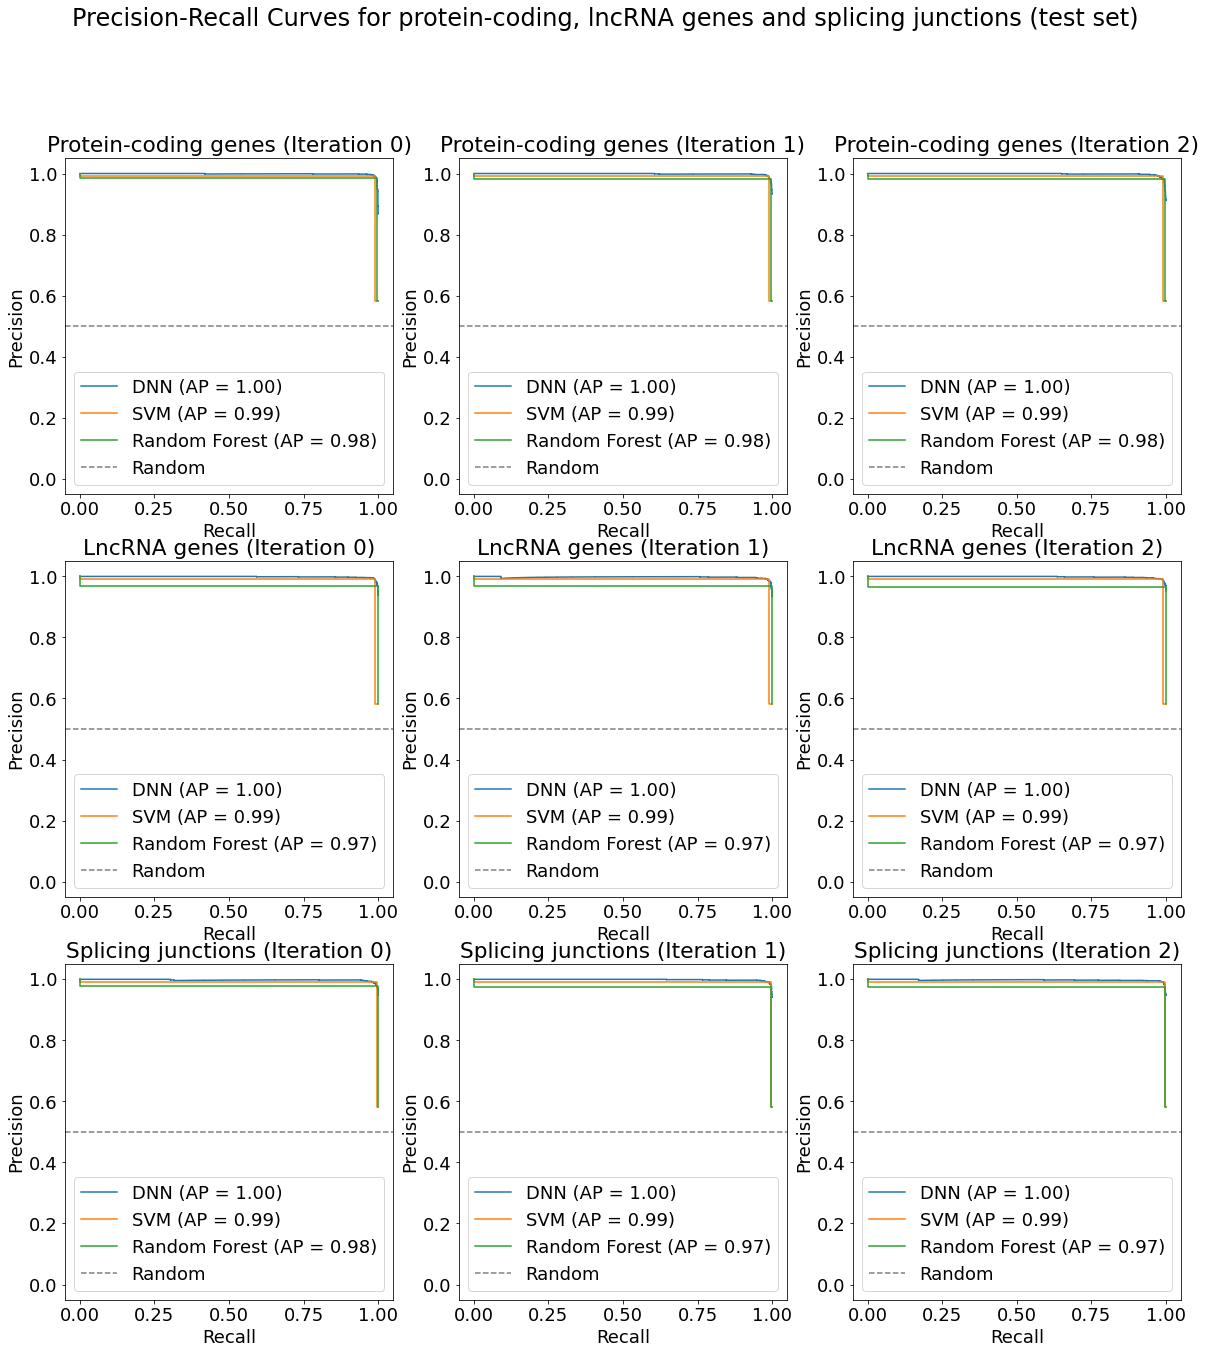

In [2]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font) 
# Protein coding genes
#fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 21), dpi=1200)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 21))


for i, ii in enumerate(binary_protein_coding):
    tmp = cmd_dir + ii 
    tmp_obj = np.load(tmp)
    all_true_y = np.argmax(tmp_obj["test_labels"], axis=1)
    all_pred_dnn = tmp_obj["test_pred"][:, 1] 
    all_pred_svm = tmp_obj["test_pred_svm"]
    all_pred_rf = tmp_obj["test_pred_rf"]
    
    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_dnn, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_dnn, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="DNN"
    )

    viz.plot(ax=ax[0, i], name="DNN")

    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_svm, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_svm, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="SVM"
    )

    viz.plot(ax=ax[0, i], name="SVM")


    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_rf, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_rf, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="Random Forest"
    )

    viz.plot(ax=ax[0, i], name="Random Forest")
    ax[0, i].plot([-0.05, 1.05], [0.5, 0.5], 'gray', linestyle='--', label='Random')    
    ax[0, i].legend(loc='lower right')
    ax[0, i].set_xlim([-0.05, 1.05])
    ax[0, i].set_ylim([-0.05, 1.05])
    ax[0, i].set_title("Protein-coding genes (Iteration {})".format(i))

# LncRNA genes


for i, ii in enumerate(binary_lncRNA):
    tmp = cmd_dir + ii    
    tmp_obj = np.load(tmp)
    all_true_y = np.argmax(tmp_obj["test_labels"], axis=1)
    all_pred_dnn = tmp_obj["test_pred"][:, 1] 
    all_pred_svm = tmp_obj["test_pred_svm"]
    all_pred_rf = tmp_obj["test_pred_rf"]
    
    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_dnn, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_dnn, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="DNN"
    )

    viz.plot(ax=ax[1, i], name="DNN")

    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_svm, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_svm, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="SVM"
    )

    viz.plot(ax=ax[1, i], name="SVM")


    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_rf, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_rf, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="Random Forest"
    )

    viz.plot(ax=ax[1, i], name="Random Forest")
    ax[1, i].plot([-0.05, 1.05], [0.5, 0.5], 'gray', linestyle='--', label='Random')    
    ax[1, i].legend(loc='lower right')
    ax[1, i].set_xlim([-0.05, 1.05])
    ax[1, i].set_ylim([-0.05, 1.05])
    ax[1, i].set_title("LncRNA genes (Iteration {})".format(i))

#splicing
for i, ii in enumerate(binary_splicing):
    tmp = cmd_dir + ii  
   
    tmp_obj = np.load(tmp)
    all_true_y = np.argmax(tmp_obj["test_labels"], axis=1)
    all_pred_dnn = tmp_obj["test_pred"][:, 1] 
    all_pred_svm = tmp_obj["test_pred_svm"]
    all_pred_rf = tmp_obj["test_pred_rf"]
    
    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_dnn, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_dnn, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="DNN"
    )

    viz.plot(ax=ax[2, i], name="DNN")

    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_svm, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_svm, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="SVM"
    )

    viz.plot(ax=ax[2, i], name="SVM")


    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_rf, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_rf, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="Random Forest"
    )

    viz.plot(ax=ax[2, i], name="Random Forest")
    ax[2, i].plot([-0.05, 1.05], [0.5, 0.5], 'gray', linestyle='--', label='Random')    
    ax[2, i].legend(loc='lower right')
    ax[2, i].set_xlim([-0.05, 1.05])
    ax[2, i].set_ylim([-0.05, 1.05])
    ax[2, i].set_title("Splicing junctions (Iteration {})".format(i))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)   
fig.suptitle("Precision-Recall Curves for protein-coding, lncRNA genes and splicing junctions (test set)")
plt.savefig(fig_dir + "SupplFig_pr_test_set.pdf", transparent=True)
plt.show()

# Precision-Recall curve for independent dataset (Supplementary Figure S4)

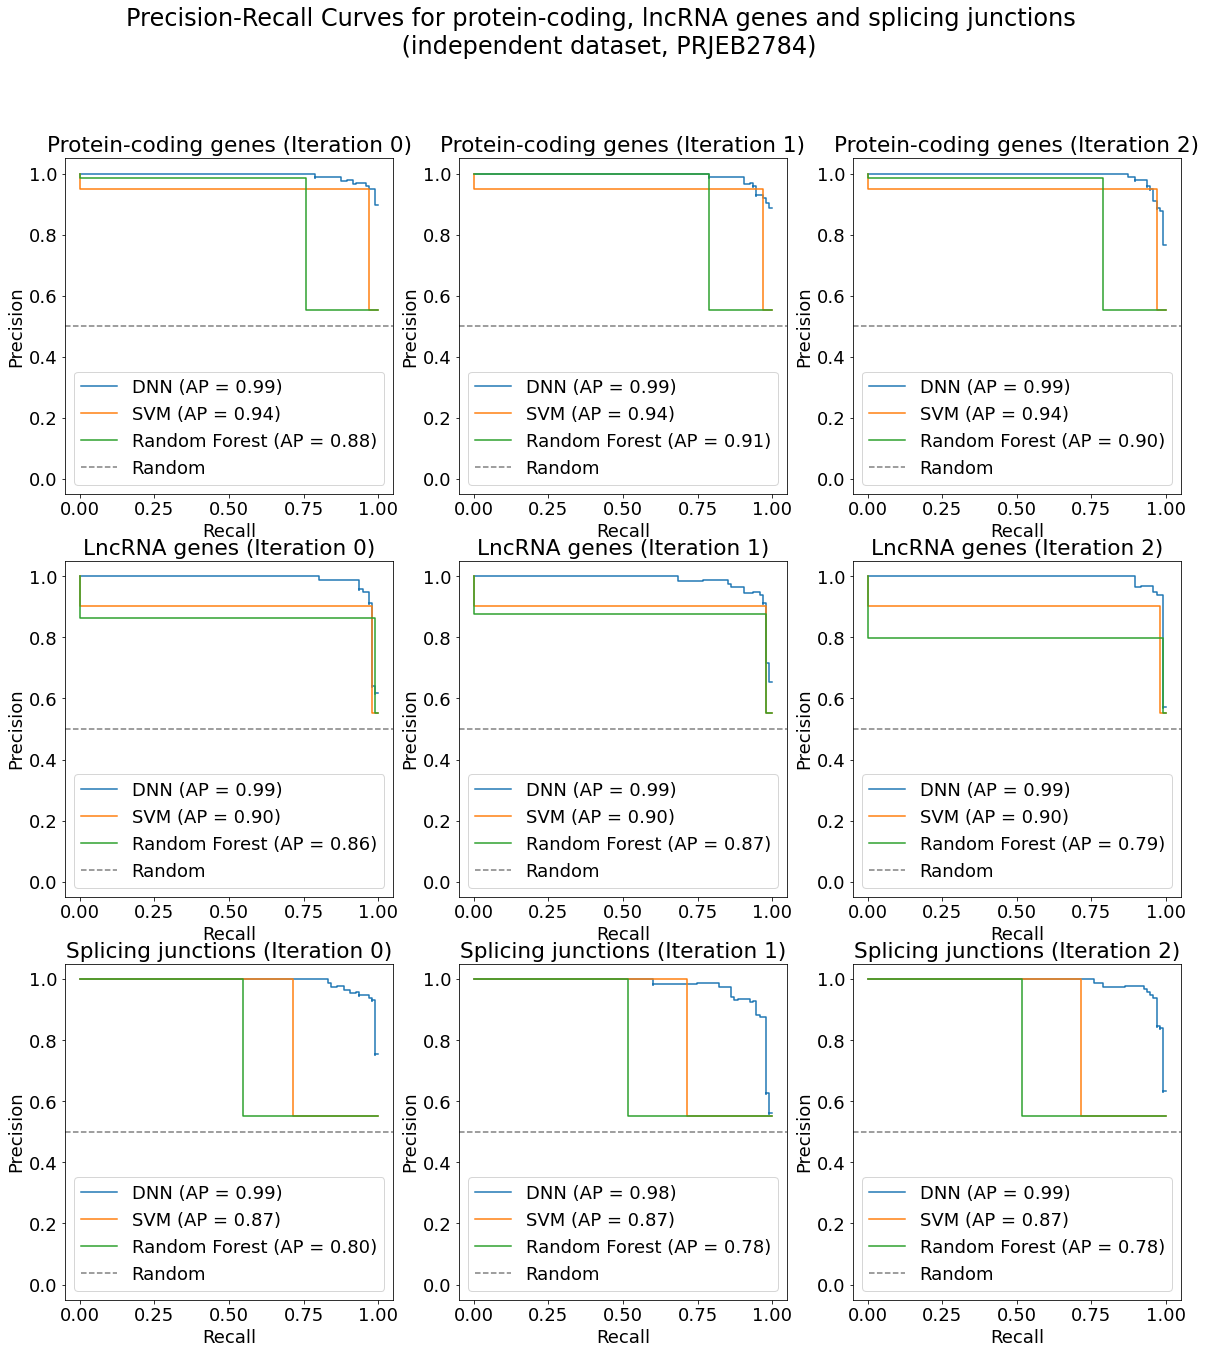

In [3]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font) 
# Protein coding genes
#fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 21), dpi=1200)
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20, 21))


for i, ii in enumerate(binary_protein_coding):
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    all_true_y = np.argmax(tmp_obj["unseen_test_labels"], axis=1)
    all_pred_dnn = tmp_obj["unseen_test_pred"][:, 1] 
    all_pred_svm = tmp_obj["unseen_test_pred_svm"]
    all_pred_rf = tmp_obj["unseen_test_pred_rf"]
    
    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_dnn, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_dnn, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="DNN"
    )

    viz.plot(ax=ax[0, i], name="DNN")

    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_svm, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_svm, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="SVM"
    )

    viz.plot(ax=ax[0, i], name="SVM")


    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_rf, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_rf, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="Random Forest"
    )

    viz.plot(ax=ax[0, i], name="Random Forest")
    ax[0, i].plot([-0.05, 1.05], [0.5, 0.5], 'gray', linestyle='--', label='Random')    
    ax[0, i].legend(loc='lower right')
    ax[0, i].set_xlim([-0.05, 1.05])
    ax[0, i].set_ylim([-0.05, 1.05])
    ax[0, i].set_title("Protein-coding genes (Iteration {})".format(i))

# LncRNA genes


for i, ii in enumerate(binary_lncRNA):
    tmp = cmd_dir + ii  
    
    tmp_obj = np.load(tmp)
    all_true_y = np.argmax(tmp_obj["unseen_test_labels"], axis=1)
    all_pred_dnn = tmp_obj["unseen_test_pred"][:, 1] 
    all_pred_svm = tmp_obj["unseen_test_pred_svm"]
    all_pred_rf = tmp_obj["unseen_test_pred_rf"]
    
    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_dnn, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_dnn, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="DNN"
    )

    viz.plot(ax=ax[1, i], name="DNN")

    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_svm, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_svm, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="SVM"
    )

    viz.plot(ax=ax[1, i], name="SVM")


    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_rf, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_rf, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="Random Forest"
    )

    viz.plot(ax=ax[1, i], name="Random Forest")
    ax[1, i].plot([-0.05, 1.05], [0.5, 0.5], 'gray', linestyle='--', label='Random')    
    ax[1, i].legend(loc='lower right')
    ax[1, i].set_xlim([-0.05, 1.05])
    ax[1, i].set_ylim([-0.05, 1.05])
    ax[1, i].set_title("LncRNA genes (Iteration {})".format(i))

#splicing
for i, ii in enumerate(binary_splicing):
    tmp = cmd_dir + ii  
    
    tmp_obj = np.load(tmp)
    all_true_y = np.argmax(tmp_obj["unseen_test_labels"], axis=1)
    all_pred_dnn = tmp_obj["unseen_test_pred"][:, 1] 
    all_pred_svm = tmp_obj["unseen_test_pred_svm"]
    all_pred_rf = tmp_obj["unseen_test_pred_rf"]
    
    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_dnn, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_dnn, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="DNN"
    )

    viz.plot(ax=ax[2, i], name="DNN")

    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_svm, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_svm, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="SVM"
    )

    viz.plot(ax=ax[2, i], name="SVM")


    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_rf, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_rf, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="Random Forest"
    )

    viz.plot(ax=ax[2, i], name="Random Forest")
    ax[2, i].plot([-0.05, 1.05], [0.5, 0.5], 'gray', linestyle='--', label='Random')    
    ax[2, i].legend(loc='lower right')
    ax[2, i].set_xlim([-0.05, 1.05])
    ax[2, i].set_ylim([-0.05, 1.05])
    ax[2, i].set_title("Splicing junctions (Iteration {})".format(i))
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font) 
fig.suptitle("Precision-Recall Curves for protein-coding, lncRNA genes and splicing junctions \n (independent dataset, PRJEB2784)")
plt.savefig(fig_dir + "SupplFig_pr_independent_PRJEB2784.pdf", transparent=True)
plt.show()

# Precision-Recall curves for liquid tumors (Supplementary Figure S5)

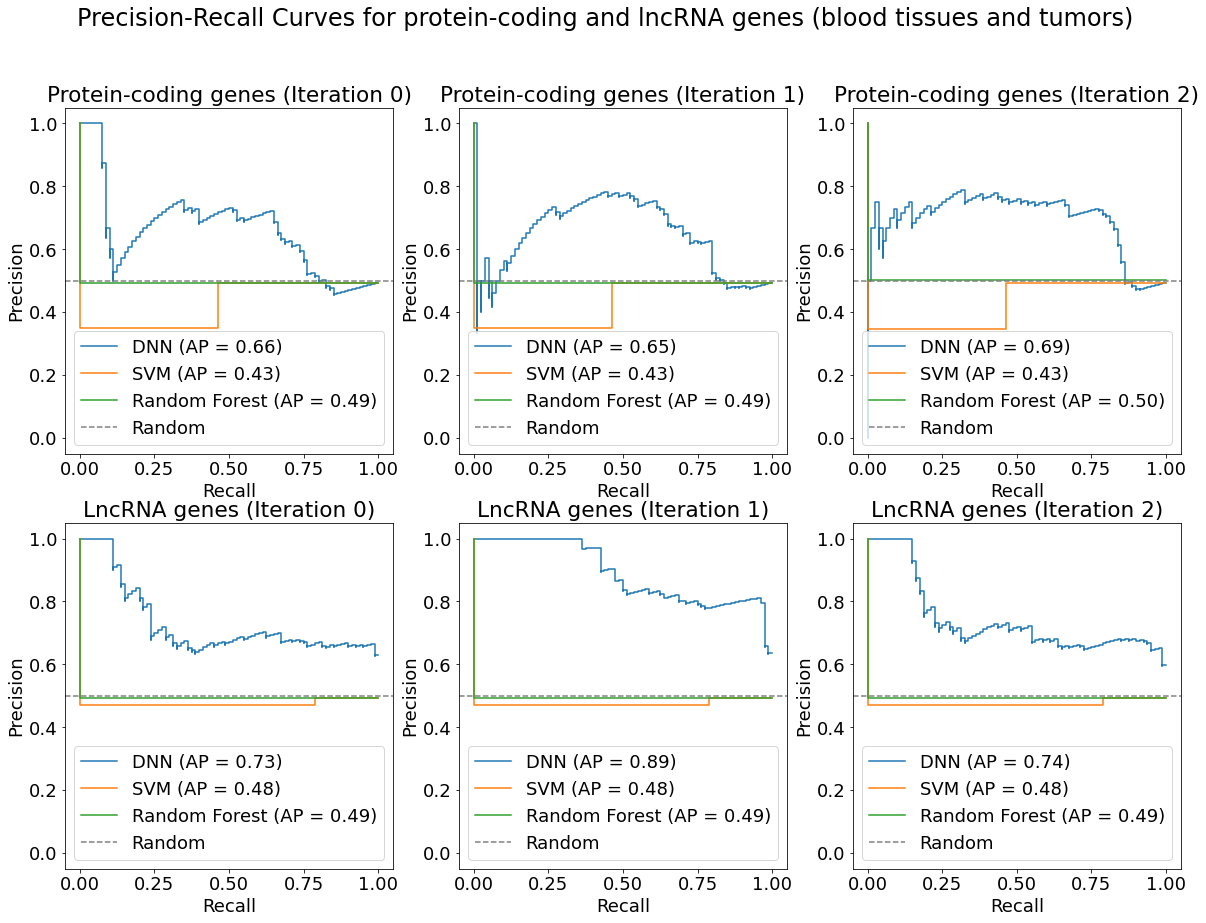

In [4]:
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 18}

matplotlib.rc('font', **font) 
# Protein coding genes
# High DPI when getting figures for paper
#fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 14), dpi=1200)
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(20, 14))


for i, ii in enumerate(binary_protein_coding):
    tmp = cmd_dir + ii  
    tmp_obj = np.load(tmp)
    all_true_y = np.argmax(tmp_obj["unseen_labels"], axis=1)
    all_pred_dnn = tmp_obj["unseen_pred"][:, 1] 
    all_pred_svm = tmp_obj["unseen_pred_svm"]
    all_pred_rf = tmp_obj["unseen_pred_rf"]
    
    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_dnn, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_dnn, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="DNN"
    )

    viz.plot(ax=ax[0, i], name="DNN")

    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_svm, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_svm, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="SVM"
    )

    viz.plot(ax=ax[0, i], name="SVM")


    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_rf, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_rf, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="Random Forest"
    )

    viz.plot(ax=ax[0, i], name="Random Forest")
    ax[0, i].plot([-0.05, 1.05], [0.5, 0.5], 'gray', linestyle='--', label='Random')    
    ax[0, i].legend(loc='lower right')
    ax[0, i].set_xlim([-0.05, 1.05])
    ax[0, i].set_ylim([-0.05, 1.05])
    ax[0, i].set_title("Protein-coding genes (Iteration {})".format(i))

# LncRNA genes


for i, ii in enumerate(binary_lncRNA):
    tmp = cmd_dir + ii  
    
    tmp_obj = np.load(tmp)
    all_true_y = np.argmax(tmp_obj["unseen_labels"], axis=1)
    all_pred_dnn = tmp_obj["unseen_pred"][:, 1]
    all_pred_svm = tmp_obj["unseen_pred_svm"]
    all_pred_rf = tmp_obj["unseen_pred_rf"]
    
    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_dnn, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_dnn, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="DNN"
    )

    viz.plot(ax=ax[1, i], name="DNN")

    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_svm, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_svm, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="SVM"
    )

    viz.plot(ax=ax[1, i], name="SVM")


    prec, recall, _ = metrics.precision_recall_curve(all_true_y, all_pred_rf, pos_label=1)

    aupr = metrics.average_precision_score(all_true_y, all_pred_rf, pos_label=1)

    viz = metrics.PrecisionRecallDisplay(
        precision=prec,
        recall=recall,
        average_precision=aupr,
        estimator_name="Random Forest"
    )

    viz.plot(ax=ax[1, i], name="Random Forest")
    ax[1, i].plot([-0.05, 1.05], [0.5, 0.5], 'gray', linestyle='--', label='Random')    
    ax[1, i].legend(loc='lower right')
    ax[1, i].set_xlim([-0.05, 1.05])
    ax[1, i].set_ylim([-0.05, 1.05])
    ax[1, i].set_title("LncRNA genes (Iteration {})".format(i))
    
font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font) 
fig.suptitle("Precision-Recall Curves for protein-coding and lncRNA genes (blood tissues and tumors)")
plt.savefig(fig_dir + "SupplFig_pr_blood_cancer.pdf", transparent=True)
plt.show()
